## 1. Introduction
- **Objective:** Understand customer purchasing behavior and the impact of various factors on sales.
- **Dataset Overview:** Description of dataset features and target variable.


## 2. Data Loading and Setup


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Import load_data
from load_data import load_data
if __name__ == "__main__":
    # Define file paths and names
    zip_file_path = '../data.zip'
    extract_to_folder = '../data'
    train = 'train.csv'  # Replace with the actual file name if different
    test = 'test.csv'
    store = 'store.csv'

    # Load the dataset
    try:
        train_data = load_data(zip_file_path, train, extract_to_folder)
        test_data = load_data(zip_file_path, test, extract_to_folder)
        store_data =  load_data(zip_file_path, store, extract_to_folder)
        print("Data successfully loaded.")
        display(train_data.head())
    except FileNotFoundError as e:
        print(e)

/home/noh/10Academy/rossmann-pharma-sales-prediction/scripts/load_data.py:30: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, index_col=0)


Data successfully loaded.


,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# Explore the testing data
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0


In [4]:
# Explore the store dataset
store_data.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Now, merge the store dataset with the  train and test dataset on the same store to have rich set of data for analysis


In [5]:
# Merge store and train data
_train_data = train_data.merge(store_data, on='Store', how='left')
# Merege store and test data
_test_data = test_data.merge(store_data, on='Store', how='left')


In [6]:
# Now let's explore to understand the nature of the merged data
_train_data.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# Info the train data
_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2              

In [8]:
# Statistical summary of numerical data
display(train_data.describe())
display(test_data.describe())

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,0.854322,0.395833,0.443487
std,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,279.750000,2.000000,1.000000,0.000000,0.000000
50%,553.500000,4.000000,1.000000,0.000000,0.000000
75%,832.250000,6.000000,1.000000,1.000000,1.000000
max,1115.000000,7.000000,1.000000,1.000000,1.000000


In [9]:
# Check the shape of the dataset
print(f'Shape of training dataset:{_train_data.shape}')
print(f'Shape of testing dataset:{_test_data.shape} ')

Shape of training dataset:(1017209, 17)
Shape of testing dataset:(41088, 16) 


In [10]:
# Check the types of both test and train data
from data_processing import DataProcessing
# Copying
train_data = _train_data.copy()
test_data = _test_data.copy()

DataProcessing.check_data_types(train_data, test_data)


Training Dataset Data Types:

DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


Test Dataset Data Types:

Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Ass

In [11]:
# Convert the Date column to datetime64 in both training and testing dataset
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# # Map the StateHolday column from object to int64 in both training and testing dataset
# '''     'a': 1,  # Public holiday
#         'b': 2,  # Easter holiday
#         'c': 3,  # Christmas
#         '0': 0   # No holiday
# '''
# train_data = DataProcessing.convert_state_holiday(train_data)
# test_data = DataProcessing.convert_state_holiday(test_data)

Handle Missing Data

- Identify missing values in critical features like `CompetitionDistance`, `Promo2Since`, and `Sales`.
- Impute missing values (e.g., forward-filling for time-based variables or using median/mean for continuous features).



In [12]:
# Check missing values
process_train = DataProcessing(train_data)
process_test = DataProcessing(test_data)
# Identify the missing data
print('Summary of Missing Values in Train Data.')
display(process_train.missing_data_summary())
print('Summary of Missing Values in Test Data.')
display(process_test.missing_data_summary())


Summary of Missing Values in Train Data.


,Missing Count,Percentage (%)
Promo2SinceWeek,508031,49.943620
Promo2SinceYear,508031,49.943620
PromoInterval,508031,49.943620
CompetitionOpenSinceMonth,323348,31.787764
CompetitionOpenSinceYear,323348,31.787764
CompetitionDistance,2642,0.259730


Summary of Missing Values in Test Data.


,Missing Count,Percentage (%)
Promo2SinceWeek,17232,41.939252
Promo2SinceYear,17232,41.939252
PromoInterval,17232,41.939252
CompetitionOpenSinceMonth,15216,37.032710
CompetitionOpenSinceYear,15216,37.032710
CompetitionDistance,96,0.233645
Open,11,0.026772


Drop columns such as `Promo2SinceWeek`, `Promo2SinceYear`, `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear` since high percentage of the data values are missing.

In [13]:
# List of columns to drop
cols_to_drop = ['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

# Drop specified columns from both datasets
train_data.drop(columns=cols_to_drop, axis=1, inplace=True)
test_data.drop(columns=cols_to_drop, axis=1, inplace=True)

Impute low missing values with media becuase it is less sensetive to outliers

In [14]:
# Impute CompetitionDistance with median
train_data.fillna({'CompetitionDistance':train_data['CompetitionDistance'].median()}, inplace=True)
test_data.fillna({'CompetitionDistance':test_data['CompetitionDistance'].median()}, inplace=True)
        
# Impute Open column in test data with mode
test_data.fillna({'Open':test_data['Open'].mode()[0]}, inplace=True)

In [15]:
train_data.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
Store,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


**Outlier Detection using Boxplot**

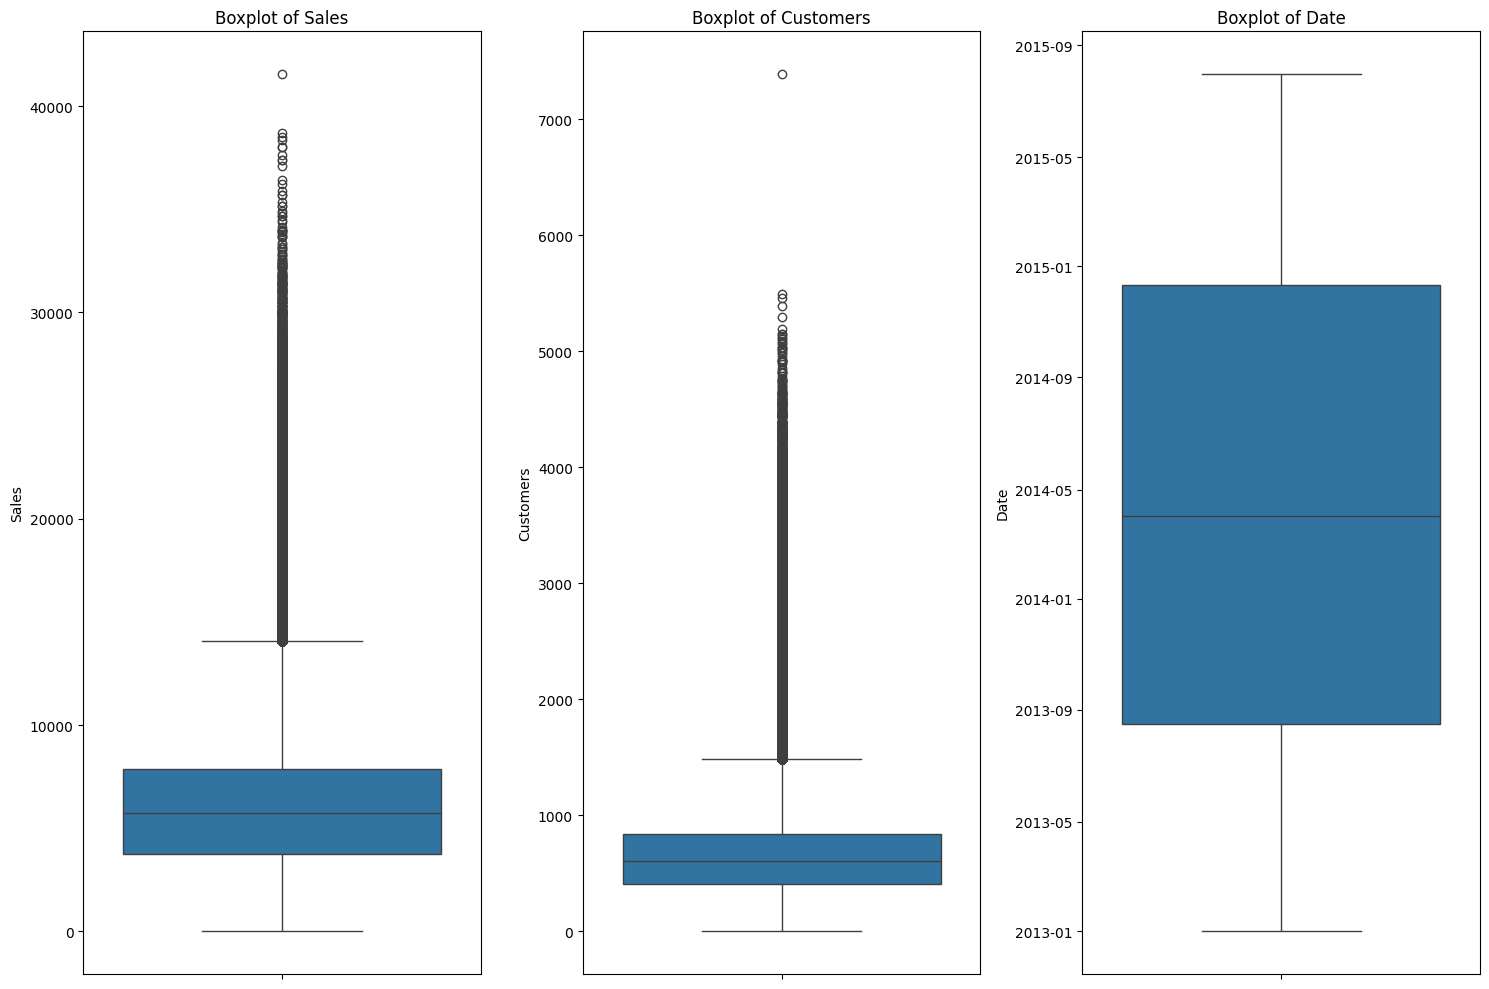

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables for outlier detection
variables = ['Sales', 'Customers', 'Date']

# Create boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)
    sns.boxplot(y=train_data[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


### EDA-Exploratory Analysis

Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [20]:
# Import the Analyzer class
from data_visualization import Visualyzer
# Create instance of EDAnalyzer
vlyr = Visualyzer(train_data, test_data)

Promo Contingency Table:
 Dataset   Test   Train
Promo                 
0        24824  629129
1        16264  388080

Chi-square test for Promo: p-value = 4.882118480134891e-09
Promo2 Contingency Table:
 Dataset   Test   Train
Promo2                
0        17232  508031
1        23856  509178
Chi-square test for Promo2: p-value = 4.761154333295861e-222
Training Promo Distribution:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Testing Promo Distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64
Training Promo2 Distribution:
 Promo2
1    0.500564
0    0.499436
Name: proportion, dtype: float64
Testing Promo2 Distribution:
 Promo2
1    0.580607
0    0.419393
Name: proportion, dtype: float64


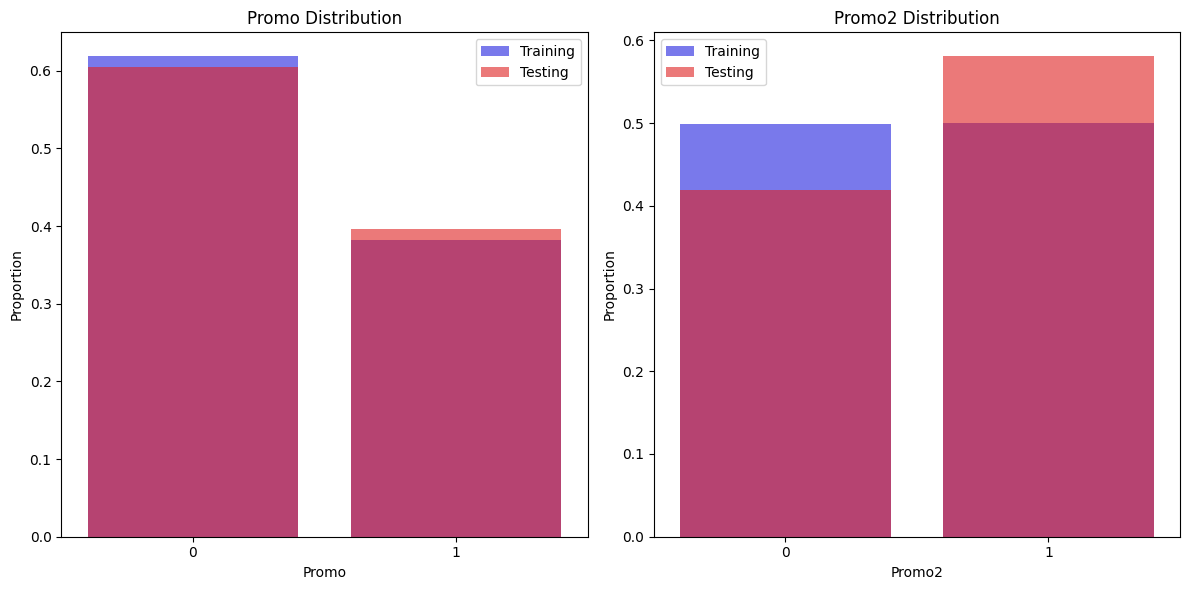

In [21]:
# Check the distributions
vlyr.check_promotion_distribution()


**Summary**

- `Promo`: The distributions of one-time promotions (Promo) in both the training and testing sets are quite similar, indicating that the data is balanced regarding these promotions.

- `Promo2`: There is a significant difference in the distributions of long-term promotions (`Promo2`). The training set shows a higher proportion of stores not participating in the promotion (`Promo2 = 0`), while the testing set has a higher proportion of participating stores (`Promo2 = 1`).


Check & compare sales behavior before, during, and after holidays


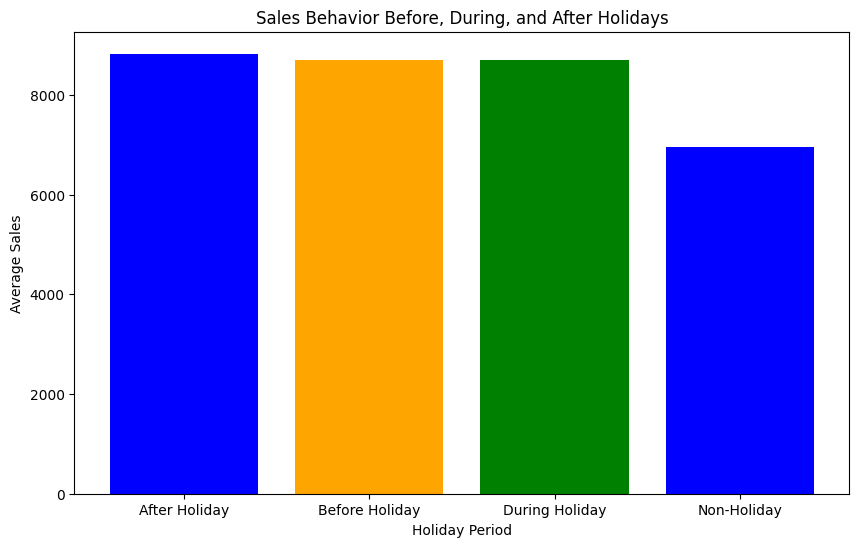

In [22]:
# Compare sales behaviour

vlyr.compare_sales_behaviour()